# Basic Content Recommender

Recommender systems are powerful tools for data science used heavily by companies such as Netflix and Amazon.

Every time you see phrases like "Other customers also bought..." or "Viewers like you also watch..." there is a recommender system at work.

A content recommendation system relies on similarties in item descriptions to provide recommendations.

Learn more about [Cosine Similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) here!

Learn more about the [tf-idf](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) here!

In [1]:
# Import packages
import os
import pandas as pd

## Import and check data

In [2]:
# set up data path
data_path = os.path.join('..', 'Data', 'recommender-sample-data.csv')

In [3]:
# Read in data
df = pd.read_csv(data_path)

In [4]:
# View data
df

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."
...,...,...
495,496,Cap 2 bottoms - Cut loose from the maddening c...
496,497,Cap 2 crew - This crew takes the edge off fick...
497,498,All-time shell - No need to use that morning T...
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...


## Create tf-idf matrix

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Key arguments for TfidfVectorizer
 * analyzer - level of analysis (i.e., word or character)
 * ngram_range - range for n-gram inclusion
 * min_df - minimum document frequency score to be included
 * stop_words - words to be removed from the matrix

### Sample tf-idf

In [6]:
# Set up our tf-idf vectorizer
sample_tf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df=0, stop_words='english')

In [7]:
# Create dummy data frame for test example
sent_df = pd.DataFrame([['This is an important sentence about cats.'], ['Here is another sentence about cats.'], ['Important news arrived about dogs.'], ['Dogs have learned data science.']])
sent_df['id']=[1, 2, 3, 4]
sent_df

,0,id
0,This is an important sentence about cats.,1
1,Here is another sentence about cats.,2
2,Important news arrived about dogs.,3
3,Dogs have learned data science.,4


In [8]:
# Apply out tf-idf on the sentence column of the data
sample_tfidf = sample_tf.fit_transform(sent_df[0])

In [9]:
# Check resulting shape
sample_tfidf.shape

(4, 9)

In [10]:
# Put data back into a df to view whats happening.
pd.DataFrame(sample_tfidf.todense(), columns=sorted(sample_tf.vocabulary_.items(), key=lambda item: item[1]))

,"(arrived, 0)","(cats, 1)","(data, 2)","(dogs, 3)","(important, 4)","(learned, 5)","(news, 6)","(science, 7)","(sentence, 8)"
0,0.000000,0.577350,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.577350
1,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107
2,0.555283,0.000000,0.000000,0.437791,0.437791,0.000000,0.555283,0.000000,0.000000
3,0.000000,0.000000,0.525473,0.414289,0.000000,0.525473,0.000000,0.525473,0.000000


### Sentences have been vectorized into an array

Notice the 4 sentences (0-3), have broken down by whether they contain a specific word or not.

Notice some words, known as stop words, have been removed (e.g, this, have, about).

This sparse matrix can now be used to generate metrics of similarity such as cosine similarity. 

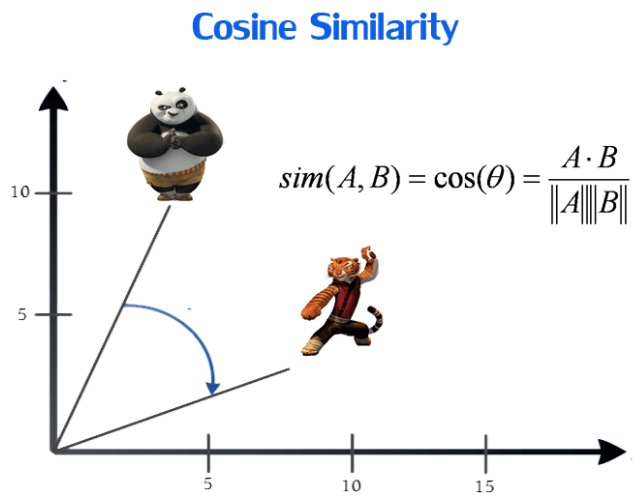

In [11]:
# Calculate cosine similarities
sample_cosine_similarities = cosine_similarity(sample_tfidf) 

In [12]:
# View cosine similarities
sample_cosine_similarities

array([[1.        , 0.81649658, 0.25275889, 0.        ],
       [0.81649658, 1.        , 0.        , 0.        ],
       [0.25275889, 0.        , 1.        , 0.18137198],
       [0.        , 0.        , 0.18137198, 1.        ]])

In [13]:
# Create empty dictionary to hold results
sample_results = {}

In [14]:
# Iterate over df and find closest matches
for idx, row in sent_df.iterrows():
   similar_indices = sample_cosine_similarities[idx].argsort()[:-100:-1] 
   similar_items = [(sample_cosine_similarities[idx][i], sent_df['id'][i]) for i in similar_indices] 
   sample_results[row[0]] = similar_items[1:]

In [15]:
# View results for each sentence
sample_results

{'This is an important sentence about cats.': [(0.816496580927726, 2),
  (0.252758885116426, 3),
  (0.0, 4)],
 'Here is another sentence about cats.': [(0.816496580927726, 1),
  (0.0, 4),
  (0.0, 3)],
 'Important news arrived about dogs.': [(0.252758885116426, 1),
  (0.18137198239804392, 4),
  (0.0, 2)],
 'Dogs have learned data science.': [(0.18137198239804392, 3),
  (0.0, 2),
  (0.0, 1)]}

In [16]:
# keys are the sentences in this example
sample_results.keys()

dict_keys(['This is an important sentence about cats.', 'Here is another sentence about cats.', 'Important news arrived about dogs.', 'Dogs have learned data science.'])

In [17]:
# Just reads the results out of the dictionary
def sample_recommend(sentence, num):
    print("Recommending " + str(num) + " products similar to " + str(sentence) + "...")   
    print("-------")    
    recs = sample_results[sentence][:num]   
    for rec in recs: 
       print("Recommended: " + str(rec[1]) + " (score:" +      str(rec[0]) + ")")

In [18]:
sample_recommend('This is an important sentence about cats.', 3)

Recommending 3 products similar to This is an important sentence about cats....
-------
Recommended: 2 (score:0.816496580927726)
Recommended: 3 (score:0.252758885116426)
Recommended: 4 (score:0.0)


In [19]:
sample_recommend('Dogs have learned data science.', 3)

Recommending 3 products similar to Dogs have learned data science....
-------
Recommended: 3 (score:0.18137198239804392)
Recommended: 2 (score:0.0)
Recommended: 1 (score:0.0)


## Full tf-idf with real data

In [20]:
# View real data again
df.head()

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


In [21]:
# see example description
df.description[0]

'Active classic boxers - There\'s a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>99 g (3.5 oz)<br><b

In [22]:
# Create tfidf vectorizer and apply it on description column of df
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['description'])

In [23]:
tfidf_matrix.shape

(500, 52262)

## Create similarity matrix and rank items

In [24]:
# Calculate cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix) 

In [25]:
# Check shape of matrix
cosine_similarities.shape

(500, 500)

In [26]:
# New empty dictionary to hold results
results = {}

In [27]:
# Iterate over dataframe, get similarities and select top 100 of them
for idx, row in df.iterrows():
   similar_indices = cosine_similarities[idx].argsort()[:-100:-1] 
   similar_items = [(cosine_similarities[idx][i], df['id'][i]) for i in similar_indices] 
   results[row['id']] = similar_items[1:] # ignore first because it is self

In [28]:
# Notice there is a key for each sentence
results.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [29]:
# We can look at the results of the first 2 items in the dictionary
dict(list(results.items())[0:2])

{1: [(0.2203792147261748, 19),
  (0.16938950913002382, 494),
  (0.16769458065321569, 18),
  (0.16485527745622983, 172),
  (0.14812615460586387, 442),
  (0.1457786328436755, 171),
  (0.14137642365361253, 21),
  (0.13884463426216992, 495),
  (0.13879533331363045, 25),
  (0.13813550299091384, 496),
  (0.13481110970996837, 487),
  (0.1322532961383362, 20),
  (0.13028260329762054, 341),
  (0.1276874354010329, 176),
  (0.126716228684137, 488),
  (0.12319623660641396, 365),
  (0.12155681060658892, 340),
  (0.11800704948227399, 60),
  (0.11786722607586679, 440),
  (0.11657908072337522, 497),
  (0.11184896270837247, 173),
  (0.11069752245804719, 441),
  (0.1085768539256295, 413),
  (0.10572078621963342, 443),
  (0.10553058093119787, 174),
  (0.10403103809186284, 359),
  (0.103380355527708, 22),
  (0.10290746221687971, 61),
  (0.10286246471301824, 312),
  (0.10166673618893808, 23),
  (0.10110641701157393, 2),
  (0.1008241850828255, 360),
  (0.09914029968349497, 175),
  (0.09882976519938362, 329)

In [30]:
# Check number of matches for first item in dictionary
top_results_for_item_1 = results[1]
len(top_results_for_item_1)

98

In [31]:
# Convenience function for using id to get a description of the item
def item(id):  
  return df.loc[df['id'] == id]['description'].tolist()[0].split(' - ')[0] 

In [32]:
# Just reads the results out of the dictionary.def 
def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")   
    print("-------")    
    recs = results[item_id][:num]   
    for rec in recs: 
       print("Recommended: " + item(rec[1]) + " (score:" +      str(rec[0]) + ")")

## Test Recommender

In [33]:
recommend(item_id=11, num=5)

Recommending 5 products similar to Baby sunshade top...
-------
Recommended: Sunshade hoody (score:0.2133029602108503)
Recommended: Baby baggies apron dress (score:0.10975311296284804)
Recommended: Runshade t-shirt (score:0.09988151262780731)
Recommended: Runshade t-shirt (score:0.09530698241688208)
Recommended: Runshade top (score:0.08510550093018408)


In [34]:
recommend(item_id=50, num=10)

Recommending 10 products similar to Guidewater duffle...
-------
Recommended: Guidewater duffle (score:0.6895541163108568)
Recommended: Stormfront pack (score:0.15347519932710635)
Recommended: Great divider (score:0.15269530355511318)
Recommended: Sub divider (score:0.1502147795912542)
Recommended: Pack vest (score:0.13448346517160553)
Recommended: Hip pack (score:0.10191093186146363)
Recommended: Single shot (score:0.09937077698422052)
Recommended: Atom (score:0.09719552205229985)
Recommended: Hip chest pack (score:0.09583801428070755)
Recommended: Lw travel courier (score:0.09241100964485276)


In [35]:
recommend(item_id=1, num=100)

Recommending 100 products similar to Active classic boxers...
-------
Recommended: Cap 1 boxer briefs (score:0.2203792147261748)
Recommended: Active boxer briefs (score:0.16938950913002382)
Recommended: Cap 1 bottoms (score:0.16769458065321569)
Recommended: Cap 1 t-shirt (score:0.16485527745622983)
Recommended: Cap 3 bottoms (score:0.14812615460586387)
Recommended: Cap 1 bottoms (score:0.1457786328436755)
Recommended: Cap 1 t-shirt (score:0.14137642365361253)
Recommended: Active briefs (score:0.13884463426216992)
Recommended: Cap 4 bottoms (score:0.13879533331363045)
Recommended: Cap 2 bottoms (score:0.13813550299091384)
Recommended: Cap 1 crew (score:0.13481110970996837)
Recommended: Cap 1 graphic t-shirt (score:0.1322532961383362)
Recommended: Cap 1 scoop (score:0.13028260329762054)
Recommended: Cap 4 bottoms (score:0.1276874354010329)
Recommended: Cap 1 graphic crew (score:0.126716228684137)
Recommended: Organic cotton boxers (score:0.12319623660641396)
Recommended: Cap 1 graphic t-

## You've now successfully built a content recommendation system!

Next steps would be to repeat this process with another data source.

Or extend you knowledge of recommenders by exploring [colloborative recommendation](https://pub.towardsai.net/recommendation-system-in-depth-tutorial-with-python-for-netflix-using-collaborative-filtering-533ff8a0e444) systems.